## Calculating the R peak using derivative and threeshold value
The code and the function for the derivative and R peak calculation are located in RpeakUsingDerivative.
In this notebook we will just visualize and test the functions.


### Import Section 

In [1]:
import sys
import os
# go up one directory from notebooks/ → project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
import numpy as np
from src import RpeakUsingDerivative, PreProcessing

from scipy.signal import fftconvolve

import matplotlib.pyplot as plt

In [16]:
#Parameters
record_path = os.path.join(os.getcwd(), "..", "data", "100")
starting_sample = 5
ending_sample = 15000
channel_size =1 #Only take the voltage value of the MLII, V5. 

#Take input
record,_ =PreProcessing.record_annotation(record_path,starting_sample,ending_sample,channel_size)
fs = record.fs
sample = np.array(record.p_signal.tolist())
print("60s sample size:- ", 60*fs)
print(sample[starting_sample:ending_sample,0])

60s sample size:-  21600
[-0.145 -0.15  -0.16  ... -0.52  -0.54  -0.545]


### Signal PreProcessing
Applying the bandpass filter on the original signal to remove noise


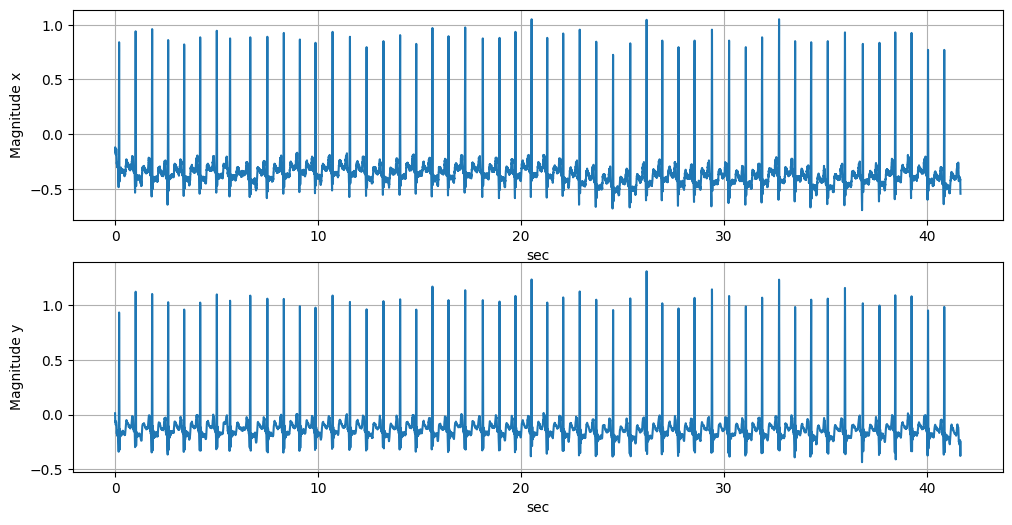

In [17]:

#filter parameters
low_freq = 0.5
high_freq = 40
N = 500

#convolution
h = PreProcessing.windowedimpulseResponse(low_freq, high_freq, fs, N)
x = sample[:,0] #taking theMLII as the input data
y_n = fftconvolve(x, h, mode='same')

#plot the y_n values
fig, axs = plt.subplots(2,1,figsize=(12,6))
time_axis = np.arange(len(x))
time_axis = time_axis[:] / fs

axs[0].plot(time_axis,x)
axs[0].set_ylabel("Magnitude x")
axs[0].set_xlabel("sec")
axs[0].grid(True)

axs[1].plot(time_axis,y_n)
axs[1].set_ylabel("Magnitude y")
axs[1].set_xlabel("sec")
axs[1].grid(True)
plt.show()





### Extracting the R_peak index using Derivative and Threshold values.
The RR peak times are calculated using the RpeakUsingDerivative.py code. For more details on calculation have a look at the .py file.

During calculation I have skiped some samples after a peak detection else the algorithm will detect the same R peak as multiple peak values.
From internet search, I found that the least distance between two RR interval is 200ms. Below that it is dangerous and heart cannot hold for long.
So 200ms corresponds to fs * 0.2, which is the exact number of samples skipped by the algorithm.






In [18]:
import src.RpeakUsingDerivative as RpeakUsingDerivative
import importlib
importlib.reload(RpeakUsingDerivative)

#Peak Calculation parameters
threshold = 0.3 #in mv
x = np.arange(len(sample[:,0])) #The x axis value for the derivative
y = y_n
samples_to_skip = int(0.2 * fs)


#Calculating the peak index value
RP_index = RpeakUsingDerivative.calcRpeakIndex(x,y,threshold) 

RP_time = RP_index[:]/fs
print("The peak values are observed at time(s):- ",RP_time)


The peak values are observed at time(s):-  [ 0.16111111  0.975       1.78888889  2.575       3.36944444  4.15555556
  4.97222222  5.625       6.61944444  7.46388889  8.275       9.06666667
  9.83611111 10.67777778 11.53055556 12.35277778 13.18055556 14.00277778
 14.8        15.59166667 15.65       16.38888889 17.20833333 18.07777778
 18.9        19.68611111 20.47222222 20.53055556 21.25277778 22.03888889
 22.85       23.66666667 24.49444444 25.33888889 26.14444444 26.91944444
 27.71944444 28.50833333 29.36388889 30.20833333 31.03611111 31.83611111
 32.66944444 33.46388889 34.25       35.07222222 35.91666667 36.79444444
 37.61944444 38.39722222 39.2        40.01111111 40.81111111]


### Calculating the HeartBeat using the calculaed R peak index values.

In [21]:
r_interval = np.zeros(len(RP_time)-1)
for i in range (len(RP_time)-1):
    r_interval[i] = RP_time[i+1] - RP_time[i]
mean = np.sum(r_interval) / len(r_interval)
HR = 60/mean
print("The calculated HR is:- ",HR)
    

The calculated HR is:-  76.75276752767527
